Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf
from IPython.display import display

In [249]:
import io
from google.colab import files
upload = files.upload()

Saving data.csv to data (2).csv


In [250]:
data_kp = pd.read_csv(io.BytesIO(upload['data.csv']))

In [252]:
data_kp.head(9)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
5,69.680748,39.968748,29.183551,37.563364,62.864299,40.169271,76.898243,41.171888,36.401047,39.367626,21.765533,38.565533,59.766280,31.651290,83.313645,35.358056,39.408000,30.546393,14.949084,32.150131,52.468486,58.800000,64.869084,82.471178,31.990430,81.669084,49.308112,78.487626,49.432374,93.898766,167 169 170 167 156 145 106 68 52 24 20 15 21 ...
6,64.131866,34.290040,29.578953,33.138040,57.797154,35.154040,69.026577,34.290040,34.761664,33.714040,24.108242,33.138040,58.661154,27.091329,76.225289,29.107329,40.233020,27.091329,19.500886,27.667329,46.855087,53.006174,55.781799,70.570953,33.898309,70.282953,45.127732,65.099597,45.415732,78.057020,109 109 125 141 145 139 120 81 45 34 31 35 36 ...
7,67.468893,39.413452,29.355961,39.621717,59.554951,40.454773,75.591612,40.038245,37.478214,40.454773,21.025398,40.038245,56.014136,27.333903,84.130485,31.291014,39.769165,26.917375,11.861592,31.915806,47.891883,56.907961,66.843961,80.025786,30.189204,81.275184,48.100194,71.278602,48.516816,91.063922,178 177 178 179 179 179 181 185 188 184 192 20...
8,65.802880,34.755200,27.475840,36.185600,58.652160,37.329280,72.952960,35.899520,36.342400,37.043200,20.325120,37.615360,57.507840,25.030400,79.273600,28.634240,36.342400,26.174720,12.888960,31.322880,48.069760,55.348480,65.516800,73.368320,31.194240,74.798080,49.213440,67.648000,49.499520,83.093120,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...


In [253]:
data_kp.describe(include = 'all')

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2140
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118 102 95 98 100 96 92 88 95 96 101 115 132 1...
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,22.361617,38.034571,56.147991,29.222304,79.617523,29.656570,39.272084,29.413747,15.761707,30.452947,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412,NaN
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,2.768804,2.654903,2.819914,2.867131,3.312647,3.627187,2.609648,2.842219,3.337901,3.644342,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557,NaN
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,11.054589,26.521633,35.581733,15.859361,55.549929,10.522325,25.060327,16.476000,3.826243,13.224453,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296,NaN
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,20.631964,36.569765,54.562757,27.590944,77.732395,27.658656,37.555192,27.798773,13.540535,28.268263,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480,NaN
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,22.529600,37.876900,56.239984,29.468466,79.797607,29.753523,39.247681,29.528098,15.760876,30.333323,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899,NaN
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,24.202338,39.401034,57.926361,31.079433,81.559651,31.763791,40.824154,31.134740,17.871569,32.661300,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976,NaN


In [254]:
data_kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [255]:
data_kp.isna().any()

left_eye_center_x            False
left_eye_center_y            False
right_eye_center_x           False
right_eye_center_y           False
left_eye_inner_corner_x      False
left_eye_inner_corner_y      False
left_eye_outer_corner_x      False
left_eye_outer_corner_y      False
right_eye_inner_corner_x     False
right_eye_inner_corner_y     False
right_eye_outer_corner_x     False
right_eye_outer_corner_y     False
left_eyebrow_inner_end_x     False
left_eyebrow_inner_end_y     False
left_eyebrow_outer_end_x     False
left_eyebrow_outer_end_y     False
right_eyebrow_inner_end_x    False
right_eyebrow_inner_end_y    False
right_eyebrow_outer_end_x    False
right_eyebrow_outer_end_y    False
nose_tip_x                   False
nose_tip_y                   False
mouth_left_corner_x          False
mouth_left_corner_y          False
mouth_right_corner_x         False
mouth_right_corner_y         False
mouth_center_top_lip_x       False
mouth_center_top_lip_y       False
mouth_center_bottom_

In [256]:
data_kp['Image'] = data_kp['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96,96))

In [257]:
data_kp['Image'][0].shape

(96, 96)

Visualization

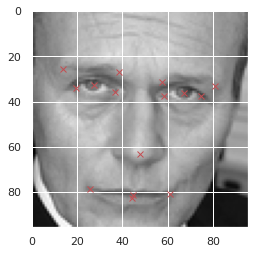

In [258]:
i = np.random.randint(1,len(data_kp))
plt.imshow(data_kp['Image'][i], cmap = 'gray')
for j in range(1,31,2):
    plt.plot(data_kp.loc[i][j-1], data_kp.loc[i][j], 'rx')

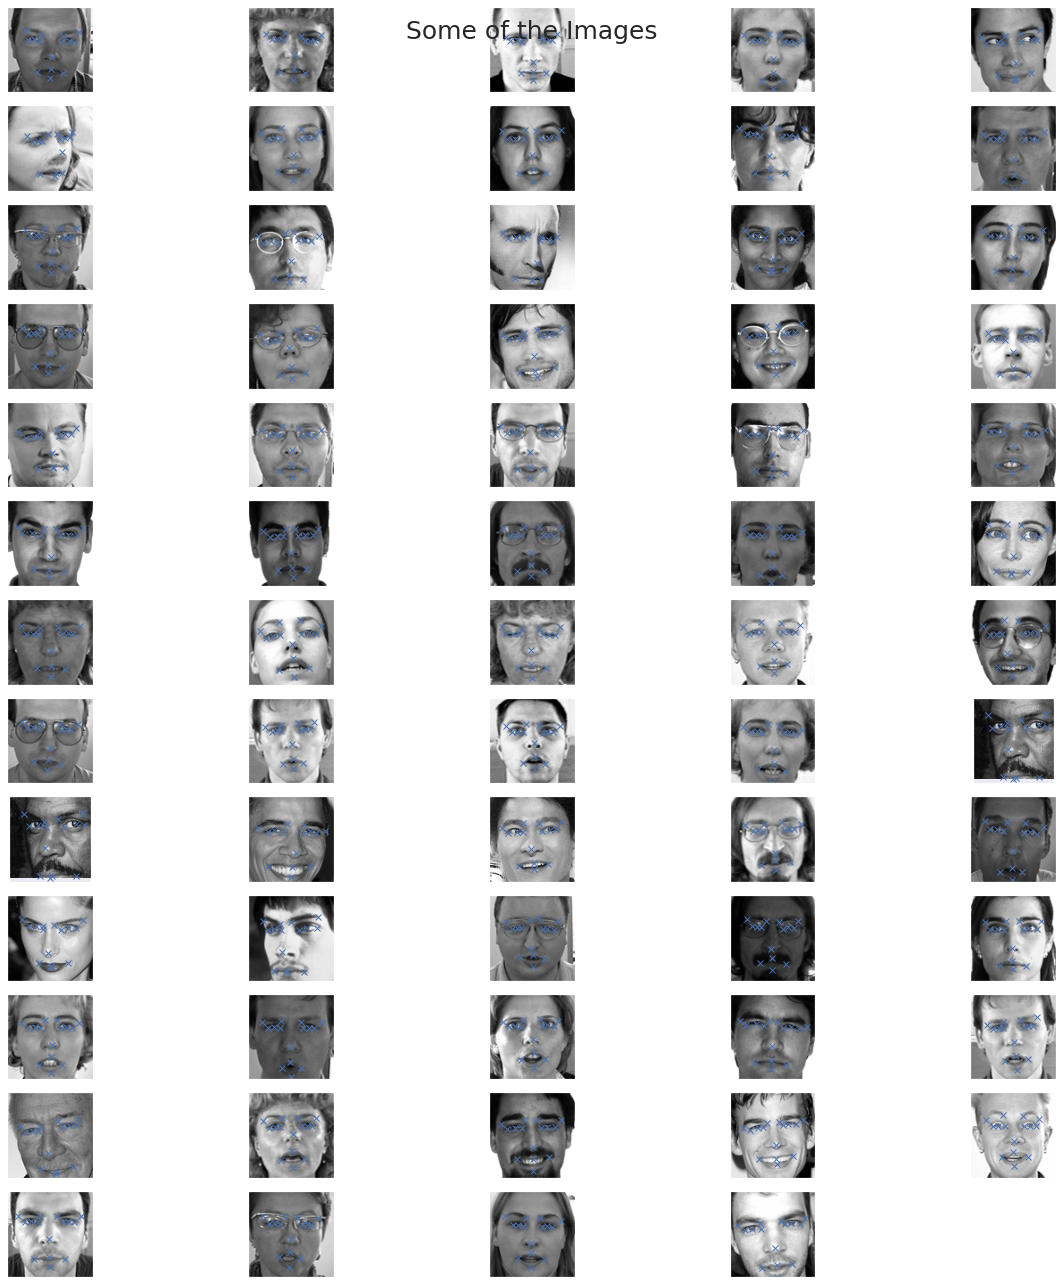

In [259]:
fig = plt.figure(figsize = (18,18))
plt.suptitle("Some of the Images", fontsize = 25)

for i in range(64):
    j = np.random.randint(1,len(data_kp))
    ax = fig.add_subplot(13,5,i+1)
    image = plt.imshow(data_kp['Image'][j], cmap = 'gray')
    image.axes.get_yaxis().set_visible(False)
    image.axes.get_xaxis().set_visible(False)
    for k in range(1,31,2):
        plt.plot(data_kp.loc[j][k-1], data_kp.loc[j][k], 'bx')
    fig.tight_layout()

Image Augmentation

In [260]:
import copy
data_c = copy.copy(data_kp)

In [261]:
allcol = data_c.columns[:-1]
allcol

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [262]:
data_c['Image'] = data_c['Image'].apply(lambda x: np.flip(x, axis = 0))
for i in range(len(allcol)):
    if i % 2 != 0:
        data_c[allcol[i]] = data_c[allcol[i]].apply(lambda x : 96. - float(x))

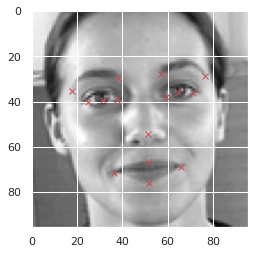

In [263]:
plt.imshow(data_kp['Image'][23], cmap = 'gray')
for j in range(1,31,2):
    plt.plot(data_kp.loc[23][j-1], data_kp.loc[23][j], 'rx')

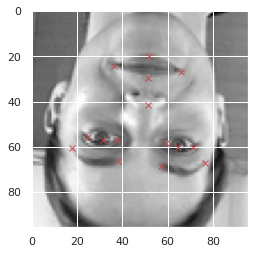

In [264]:
plt.imshow(data_c['Image'][23], cmap = 'gray')
for j in range(1,31,2):
    plt.plot(data_c.loc[23][j-1], data_c.loc[23][j], 'rx')

In [265]:
data_aug = np.concatenate((data_kp, data_c))

In [266]:
data_aug.shape

(4280, 31)

In [267]:
data_c2 = copy.copy(data_kp)
data_c2['Image'] = data_c2['Image'].apply(lambda x: np.clip(np.random.uniform(1.3,1.8)*x, 0.0, 255.0))

In [268]:
data_aug2 = np.concatenate((data_aug, data_c2))
data_aug2.shape

(6420, 31)

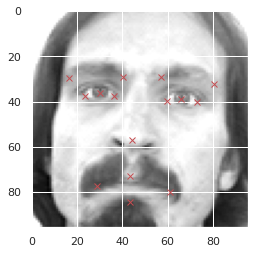

In [269]:
plt.imshow(data_c2['Image'][0], cmap = 'gray')
for j in range(1,31,2):
    plt.plot(data_c2.loc[0][j-1], data_c2.loc[0][j], 'rx')

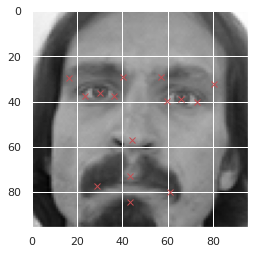

In [270]:
plt.imshow(data_kp['Image'][0], cmap = 'gray')
for j in range(1,31,2):
    plt.plot(data_kp.loc[0][j-1], data_kp.loc[0][j], 'rx')

Normalization

In [29]:
img = data_aug2[:,-1]

In [30]:
img = img/255.

In [31]:
inputs = np.empty((len(img), 96, 96, 1))

for i in range(len(img)):
    inputs[i,] = np.expand_dims(img[i], axis = 2)
    
inputs = np.asarray(inputs).astype(np.float32)
inputs.shape

(6420, 96, 96, 1)

In [32]:
targets = data_aug2[:,:30]
targets = np.asarray(targets).astype(np.float32)
targets.shape

(6420, 30)

Model Building

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(
                             inputs, targets, test_size=0.15, random_state=242)

Residual Network

In [35]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from keras import optimizers

In [36]:
def res_block(inputs, filters, stage):
    inputs_c = inputs
    
    f1, f2, f3 = filters
    
    inputs = Conv2D(f1, (1,1), strides =(1,1), name = 'res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(inputs)
    inputs = MaxPool2D((2,2))(inputs)
    inputs = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(inputs)
    inputs = Activation('relu')(inputs) 
    
    inputs = Conv2D(f2, (3,3), strides =(1,1), name = 'res_'+str(stage)+'_conv_b', padding = 'same', kernel_initializer= glorot_uniform(seed = 0))(inputs)
    inputs = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(inputs)
    inputs = Activation('relu')(inputs) 
    
    inputs = Conv2D(f3, (1,1), strides =(1,1), name = 'res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(inputs)
    inputs = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(inputs)
    
    
    inputs_c = Conv2D(f3, (1,1), strides =(1,1), name = 'res_'+str(stage)+'_conv_copy', padding = 'same', kernel_initializer= glorot_uniform(seed = 0))(inputs_c)
    inputs_c = MaxPool2D((2,2))(inputs_c)
    inputs_c = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(inputs_c)
    
    
    inputs = Add()([inputs, inputs_c])
    inputs = Activation('relu')(inputs)
    
    
    
    
    inputs_c = inputs
    
    
    inputs = Conv2D(f1, (1,1), strides =(1,1), name = 'res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(inputs)
    inputs = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(inputs)
    inputs = Activation('relu')(inputs) 
    
    inputs = Conv2D(f2, (3,3), strides =(1,1), name = 'res_'+str(stage)+'_identity_1_b', padding = 'same', kernel_initializer= glorot_uniform(seed = 0))(inputs)
    inputs = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(inputs)
    inputs = Activation('relu')(inputs) 
    
    inputs = Conv2D(f3, (1,1), strides =(1,1), name = 'res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(inputs)
    inputs = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(inputs)
    
    
    inputs = Add()([inputs, inputs_c])
    inputs = Activation('relu')(inputs)
    
    
    
    
    inputs_c = inputs
    
    
    inputs = Conv2D(f1, (1,1), strides =(1,1), name = 'res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(inputs)
    inputs = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(inputs)
    inputs = Activation('relu')(inputs) 
    
    inputs = Conv2D(f2, (3,3), strides =(1,1), name = 'res_'+str(stage)+'_identity_2_b', padding = 'same', kernel_initializer= glorot_uniform(seed = 0))(inputs)
    inputs = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(inputs)
    inputs = Activation('relu')(inputs) 
    
    inputs = Conv2D(f3, (1,1), strides =(1,1), name = 'res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(inputs)
    inputs = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(inputs)
    
    
    inputs = Add()([inputs, inputs_c])
    inputs = Activation('relu')(inputs)
    
    return inputs

In [37]:
input_shape = (96, 96, 1)

X_input = Input(input_shape)

inputs = ZeroPadding2D((3,3))(X_input)

inputs = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(inputs)
inputs = BatchNormalization(axis =3, name = 'bn_conv1')(inputs)
inputs = Activation('relu')(inputs)
inputs = MaxPooling2D((3,3), strides= (2,2))(inputs)

inputs = res_block(inputs, filters= [64,64,256], stage= 2)

inputs = res_block(inputs, filters= [128,128,512], stage= 3)

inputs = AveragePooling2D((2,2), name = 'Average_Pooling')(inputs)

inputs = Flatten()(inputs)
inputs = Dense(4096, activation = 'relu')(inputs)
inputs = Dropout(0.4)(inputs)
inputs = Dense(2048, activation = 'relu')(inputs)
inputs = Dropout(0.2)(inputs)
inputs = Dense(30, activation = 'relu')(inputs)


model_1_facialKeyPoints = Model( inputs= X_input, outputs = inputs)
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

Compile and Training the model

In [38]:
model_1_facialKeyPoints.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [39]:
checkpoint = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose =1, save_best_only=True)

In [41]:
hist = model_1_facialKeyPoints.fit(inputs_train, targets_train, batch_size = 32, epochs = 3, 
                                  validation_split = 0.1, callbacks=[checkpoint])

Epoch 1/3
154/154 [==============================] - 3s 21ms/step - loss: 152.9585 - accuracy: 0.5789 - val_loss: 748.5538 - val_accuracy: 0.5275

Epoch 00001: val_loss improved from inf to 748.55377, saving model to FacialKeyPoints_weights.hdf5
Epoch 2/3
154/154 [==============================] - 3s 17ms/step - loss: 98.0367 - accuracy: 0.7027 - val_loss: 202.8609 - val_accuracy: 0.6410

Epoch 00002: val_loss improved from 748.55377 to 202.86086, saving model to FacialKeyPoints_weights.hdf5
Epoch 3/3
154/154 [==============================] - 3s 17ms/step - loss: 94.5922 - accuracy: 0.7341 - val_loss: 101.3003 - val_accuracy: 0.7875

Epoch 00003: val_loss improved from 202.86086 to 101.30035, saving model to FacialKeyPoints_weights.hdf5


Saving the state of the model

In [42]:
model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json", "w") as json_file:
    json_file.write(model_json)

Assess trained model

In [43]:
with open("FacialKeyPoints-model.json", 'r') as json_file:
    json_SavedModel = json_file.read()

In [44]:
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_SavedModel)

In [45]:
model_1_facialKeyPoints.load_weights('FacialKeyPoints_weights.hdf5')

In [46]:
model_1_facialKeyPoints.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [47]:
result = model_1_facialKeyPoints.evaluate(inputs_test, targets_test)
print('Accuracy : {0:.2f}%'.format(result[1]*100))

31/31 [==============================] - 1s 8ms/step - loss: 99.5945 - accuracy: 0.7652
Accuracy : 76.74%


In [48]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

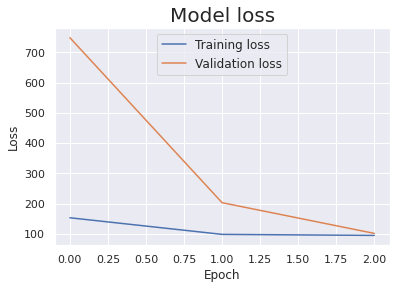

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss', fontsize = 20)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss','Validation loss'], loc = 'upper center', fontsize = 12)
plt.show()

Facial Expression Detection

In [52]:
upload = files.upload()

Saving icml_face_data.csv to icml_face_data.csv


In [53]:
data_fe = pd.read_csv('icml_face_data.csv')

In [54]:
data_fe.head(8)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
5,3,85 84 90 121 101 102 133 153 153 169 177 189 1...
6,0,30 24 21 23 25 25 49 67 84 103 120 125 130 139...
7,3,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...


In [55]:
data_fe[' pixels'][3]

'20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 108 118 130 139 134 132 126 113 97 126 148 157 161 155 154 154 164 189 204 194 168 180 188 214 214 214 216 208 220 205 187 176 162 22 17 17 25 29 32 44 47 46 54 64 67 73 79 96 104 114 134 141 137 132 120 106 120 142 153 163 164 157 150 153 158 192 222 211 173 172 187 210 216 215 214 216 219 219 195 180 171 17 17 18 26 30 31 43 46 54 67 84 92 84 98 107 98 109 129 133 136 133 110 116 138 153 160 169 156 151 149 150 147 178 224 229 176 172 187 212 211 214 218 215 218 226 203 193 175 17 14 23 31 39 46 46 51 65 84 85 70 84 101 109 101 101 124 127 131 125 114 143 145 159 166 161 144 140 143 129 127 153 207 237 196 170 182 211 222 217 225 218 216 228 208 202 181 13 15 27 35 48 48 52 61 72 71 66 78 94 97 111 100 98 114 124 135 118 134 151 152 165 176 161 139 138 155 126 109 128 162 214 208 181 170 218 231 224 227 231 225 222 214 209 195 18 15 33 47 50 54 58 58 55 67 85 99 100 104 114 100 99 113 125 135 136 148 162 166 175 185 166 143 146 161 133 11

In [56]:
def reshape_fe(x):
    return np.array(x.split(' ')).reshape(48,48,1).astype('float32')

In [57]:
import cv2

In [58]:
def resize(x):
    img = x.reshape(48,48)
    return cv2.resize(img, dsize= (96,96), interpolation = cv2.INTER_CUBIC)

In [59]:
data_fe[' pixels'] = data_fe[' pixels'].apply(lambda x : reshape_fe(x))

In [60]:
data_fe[' pixels'] = data_fe[' pixels'].apply(lambda x : resize(x))

In [61]:
data_fe.head(6)

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."
5,3,"[[85.83263, 85.39513, 84.624954, 84.56122, 84...."


In [62]:
data_fe.isna().any()

emotion    False
 pixels    False
dtype: bool

In [181]:
label_to_text = {0: 'anger', 1: 'disgust', 2: 'sad', 3: 'happiness', 4: 'surprise'}

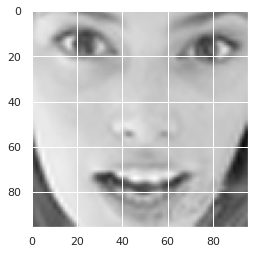

In [182]:
plt.imshow(data_fe[' pixels'][16], cmap = 'gray')


Visualization 

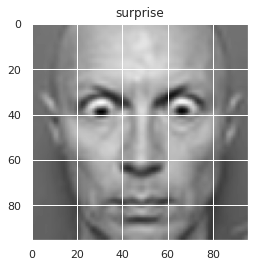

In [183]:
emo = [0,1,2,3,4]

for i in emo:
    data = data_fe[data_fe['emotion'] == i][:1]
    img = data[' pixels'].item()
    img = img.reshape(96,96)
    plt.title(label_to_text[i])
    plt.imshow(img, cmap = 'gray')

In [184]:
data_fe.emotion.value_counts().index

Int64Index([3, 2, 0, 4, 1], dtype='int64')

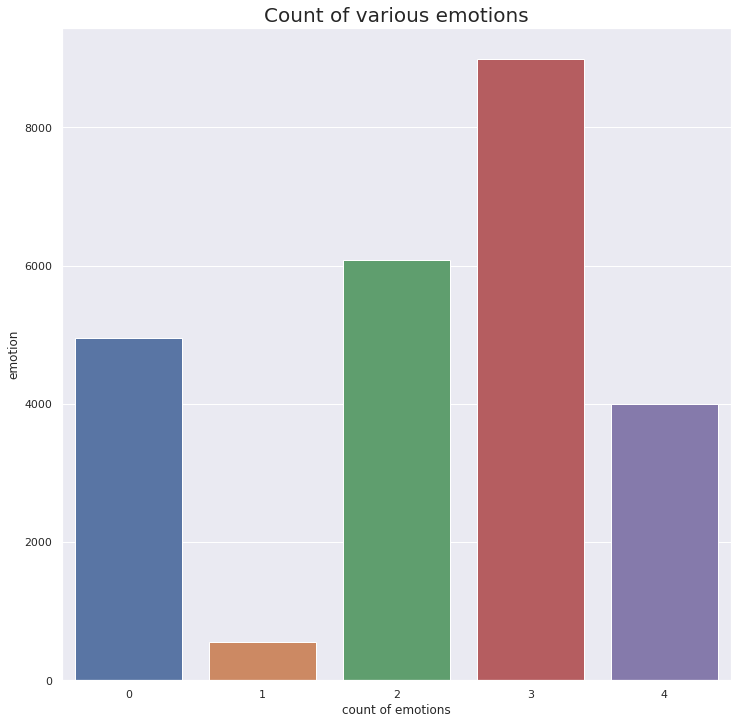

In [185]:
plt.figure(figsize = (12,12))

sns.barplot(x = data_fe.emotion.value_counts().index, y = data_fe.emotion.value_counts())
plt.title('Count of various emotions', fontsize = 20)
plt.xlabel('count of emotions')
plt.show()

Data Preparation and Image Augmentation

In [68]:
inputs = data_fe[' pixels']
targets = to_categorical(data_fe['emotion'])

In [69]:
inputs = np.stack(inputs, axis = 0)
inputs = inputs.reshape(24568, 96, 96, 1)

print(inputs.shape, targets.shape)

(24568, 96, 96, 1) (24568, 5)


In [70]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(
                                             inputs, targets, test_size=0.15, random_state=42)


In [71]:
inputs_val, inputs_test, targets_val, targets_test = train_test_split(
                                                 inputs_test, targets_test, test_size=0.25, random_state=42)

Normalize the images

In [72]:
inputs_train = inputs_train/255.
inputs_test = inputs_test/255.
inputs_val = inputs_val/255.

In [73]:
train_aug = ImageDataGenerator(rotation_range = 15,
                                width_shift_range = 0.1,
                                height_shift_range = 0.1,
                                shear_range = 0.1,
                                zoom_range = 0.1,
                                horizontal_flip = True,
                                fill_mode = "nearest")

Model Building for Facial Expression Classification

In [137]:
input_shape = (96, 96, 1)

X_input = Input(input_shape)

inputs = ZeroPadding2D((3,3))(X_input)

inputs = Conv2D(64, (5,5), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(inputs)
inputs = BatchNormalization(axis =3, name = 'bn_conv1')(inputs)
inputs = Activation('relu')(inputs)
inputs = MaxPooling2D((2,2), strides= (2,2))(inputs)

inputs = res_block(inputs, filters= [64,64,256], stage= 2)

inputs = res_block(inputs, filters= [128,128,512], stage= 3)

inputs = AveragePooling2D((4,4), name = 'Average_Pooling')(inputs)

inputs = Flatten()(inputs)
#inputs = Dense(4096, activation = 'relu')(inputs)
#inputs = Dropout(0.4)(inputs)
#inputs = Dense(2048, activation = 'relu')(inputs)
#inputs = Dropout(0.2)(inputs)
inputs = Dense(5, activation = 'softmax', name = 'Dense_Final', kernel_initializer= glorot_uniform(seed = 0))(inputs)


model_2_emotion = Model( inputs= X_input, outputs = inputs)
model_2_emotion.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_5 (ZeroPadding2D (None, 102, 102, 1)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 49, 49, 64)   1664        zero_padding2d_5[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 49, 49, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [138]:
model_2_emotion.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [139]:
earl_stop = EarlyStopping(monitor = 'val_loss', verbose = 1, patience = 7)
checkpoint = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose =1, save_best_only=True)

In [163]:
hist2 = model_2_emotion.fit(train_aug.flow(inputs_train, targets_train, batch_size = 64), epochs = 3,
                            validation_data = (inputs_val, targets_val), steps_per_epoch = len(inputs_train) // 64,
                            callbacks = [earl_stop, checkpoint])

Epoch 1/3
326/326 [==============================] - 22s 66ms/step - loss: 0.6311 - accuracy: 0.7577 - val_loss: 0.6796 - val_accuracy: 0.7420

Epoch 00001: val_loss improved from 0.69121 to 0.67957, saving model to FacialExpression_weights.hdf5
Epoch 2/3
326/326 [==============================] - 21s 65ms/step - loss: 0.6132 - accuracy: 0.7636 - val_loss: 0.6621 - val_accuracy: 0.7507

Epoch 00002: val_loss improved from 0.67957 to 0.66209, saving model to FacialExpression_weights.hdf5
Epoch 3/3
326/326 [==============================] - 21s 66ms/step - loss: 0.5903 - accuracy: 0.7751 - val_loss: 0.8269 - val_accuracy: 0.6657

Epoch 00003: val_loss did not improve from 0.66209


Saving the model

In [165]:
model2_json = model_2_emotion.to_json()
with open("FacialExp-model.json", "w") as json_file:
    json_file.write(model2_json)

Assess the performance of trained expression model

In [166]:
with open("FacialExp-model.json", "r") as json_file:
    json_savedModel = json_file.read()

In [167]:
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights("FacialExpression_weights.hdf5")
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [168]:
score = model_2_emotion.evaluate(inputs_test, targets_test)
print("Model Accuracy : {0:.2f}%".format(score[1]*100))

29/29 [==============================] - 1s 6ms/step - loss: 0.6332 - accuracy: 0.7404
Model Accuracy : 72.89%


In [169]:
hist2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [170]:
loss = hist2.history['loss']
acc = hist2.history['accuracy']
val_loss = hist2.history['val_loss']
val_acc = hist2.history['val_accuracy']

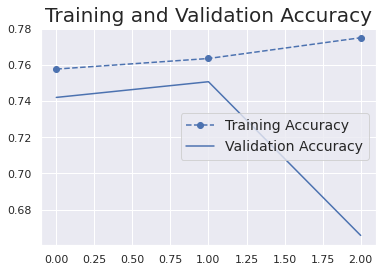

In [171]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo--', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize = 20)
plt.legend(loc = 'center right', fontsize = 14)

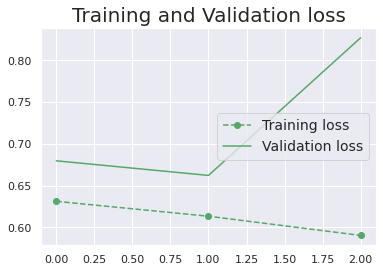

In [172]:
plt.plot(epochs, loss, 'go--', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and Validation loss', fontsize = 20)
plt.legend(loc = 'center right', fontsize = 14)

In [173]:
pred_classes = np.argmax(model_2_emotion.predict(inputs_test), axis = -1)
y_true = np.argmax(targets_test, axis = -1)

In [174]:
y_true.shape

(922,)

In [175]:
from sklearn.metrics import confusion_matrix, classification_report

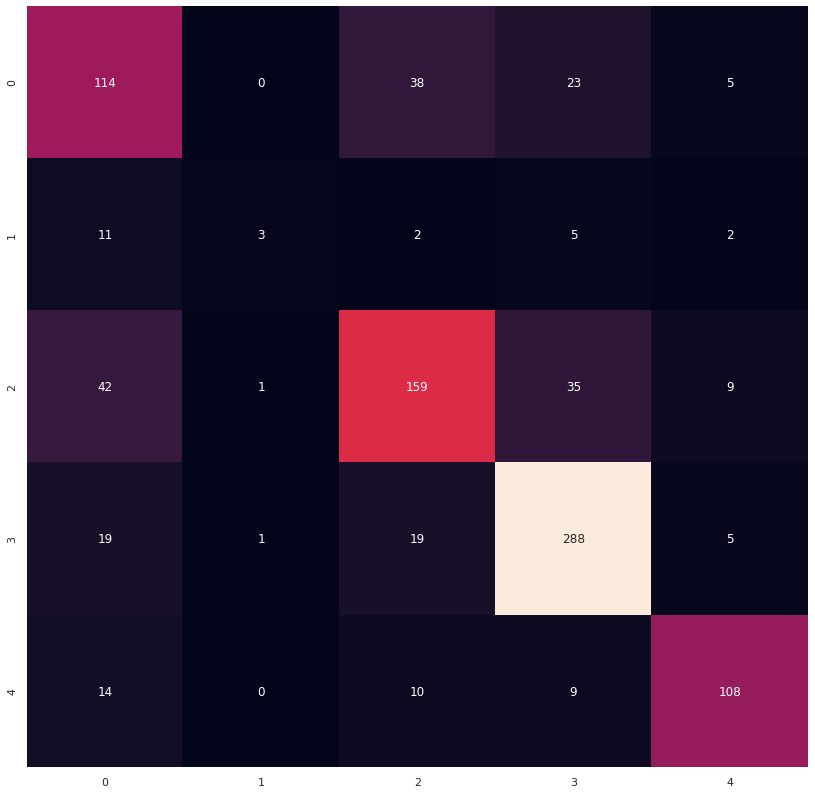

In [176]:
cm = confusion_matrix(y_true, pred_classes)
plt.figure(figsize = (14,14))
sns.heatmap(cm, annot = True, fmt = 'g', cbar=False)

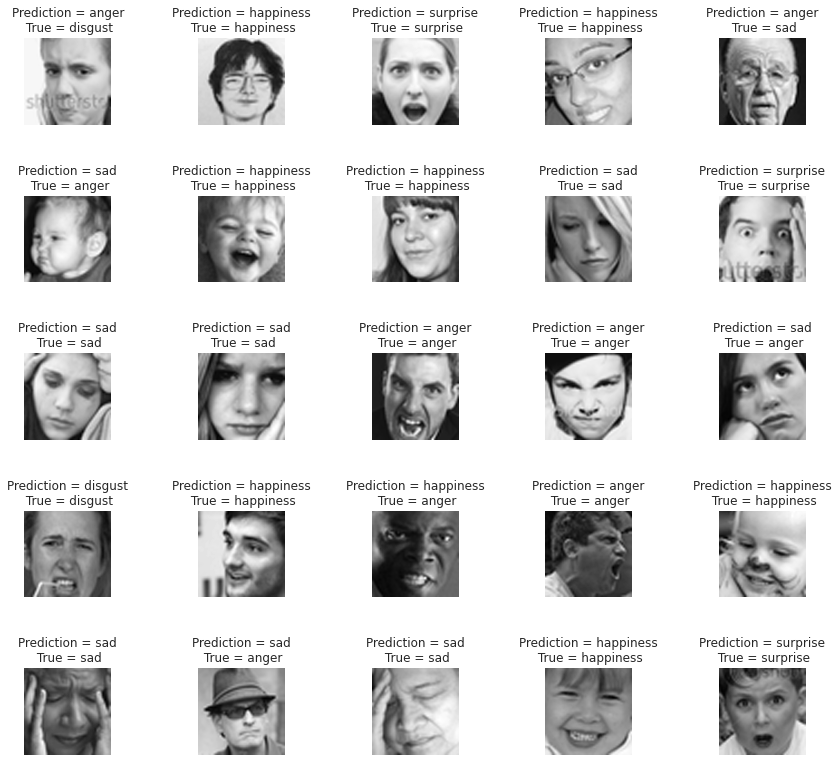

In [188]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (14, 14))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(inputs_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[pred_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [190]:
print(classification_report(y_true, pred_classes))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60       180
           1       0.60      0.13      0.21        23
           2       0.70      0.65      0.67       246
           3       0.80      0.87      0.83       332
           4       0.84      0.77      0.80       141

    accuracy                           0.73       922
   macro avg       0.70      0.61      0.62       922
weighted avg       0.73      0.73      0.72       922



Combining the Models

In [271]:
data_ind = data_kp.iloc[:, :-1]
data_ind.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [276]:
def predict(inputs_test):

  df_predict = model_1_facialKeyPoints.predict(inputs_test)

  df_emotion = np.argmax(model_2_emotion.predict(inputs_test), axis=-1)

  df_emotion = np.expand_dims(df_emotion, axis = 1)

  df_predict = pd.DataFrame(df_predict, columns = data_ind.columns.values)

  df_predict['emotion'] = df_emotion

  return df_predict

In [277]:
df_predict = predict(inputs_test)

In [278]:
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,59.799706,33.192753,26.677254,32.384747,53.885826,33.969574,65.488159,0.0,32.827034,33.495178,20.863979,34.735142,51.759460,26.954300,70.768921,27.214808,35.725342,26.401585,15.922100,28.168510,43.227795,49.631207,57.216282,65.216896,29.764639,65.327995,43.113888,61.775875,43.634201,71.613838,0
1,60.018497,41.976631,27.451357,40.566998,53.897861,41.806870,66.129501,0.0,33.349918,41.180874,21.860039,42.567940,51.805508,40.405170,70.888329,39.676991,35.743439,39.629032,16.917555,41.597111,43.986534,43.149883,58.252373,46.915398,30.971556,46.695343,44.331051,45.951595,44.933533,47.644493,3
2,62.224834,33.756676,26.565653,32.640003,55.787071,34.746647,68.341537,0.0,33.383347,34.103771,20.388077,34.936966,53.274063,26.470333,74.481369,27.761353,36.600143,25.848927,15.035053,27.244993,44.006233,52.687527,58.400814,71.178368,29.267673,70.973114,43.554813,67.310516,43.962952,78.379715,4
3,61.068768,39.378098,28.005026,38.736813,54.760880,39.607487,67.461853,0.0,34.153416,39.427216,22.095152,41.022575,52.348911,36.115330,72.103806,34.998299,36.557610,35.541851,16.963715,38.035519,45.093204,46.868729,60.347492,54.831718,32.141445,55.458569,45.936539,53.442387,46.613640,57.935738,3
4,61.033123,34.151077,26.332186,32.727184,54.753742,34.957806,66.917549,0.0,32.657585,34.216785,20.270119,35.260921,52.299046,26.966440,72.835030,28.194578,35.809586,26.349510,15.287106,27.919024,43.188229,51.355206,57.429306,68.977402,28.971771,68.820152,42.852901,65.352440,43.263260,75.445694,0


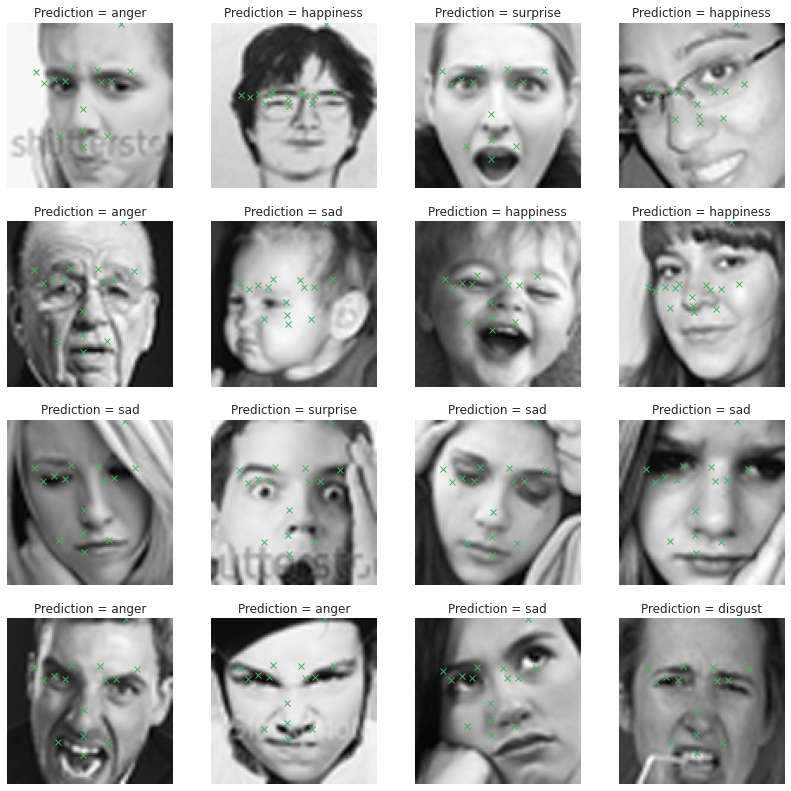

In [279]:
fig, axes = plt.subplots(4,4,figsize=(14,14))
axes = axes.ravel()

for i in range(16):
  axes[i].imshow(inputs_test[i].squeeze(), cmap = 'gray')
  axes[i].set_title("Prediction = {}".format(label_to_text[df_predict['emotion'][i]]))
  axes[i].axis('off')
  for j in range(1,31,2):
    axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'gx')
